<a href="https://colab.research.google.com/github/xuany823/ADS505_Final_Project/blob/Lei-Lin-EDA/Spotify_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# Data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Viz
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Sklearn
from sklearn import model_selection, metrics

# Feature selection


# Models
import xgboost as xgb
import lightgbm as lgb
from sklearn import linear_model, ensemble
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# # Remove warnings
import warnings
# warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Setup & Data loading

In [ ]:
# Clone from our repo into Colab
!git clone https://github.com/xuany823/ADS505_Final_Project.git
%cd ADS505_Final_Project

# Now load CSVs with the path
import pandas as pd

data_path = "Datasets/"

df = pd.read_csv(f"{data_path}spotify_churn_dataset.csv")


Cloning into 'ADS505_Final_Project'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 43 (delta 18), reused 22 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 3.84 MiB | 12.84 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/ADS505_Final_Project


In [ ]:
# Quick check
print(df.shape)

(8000, 12)


In [ ]:
# Quick preview of the df

df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
# More preview of the df

df.sample(10).T

,7092,1520,4372,252,7491,1185,7992,783,4713,4047
user_id,7093,1521,4373,253,7492,1186,7993,784,4714,4048
gender,Male,Other,Other,Other,Other,Male,Female,Other,Male,Female
age,37,35,36,18,32,21,32,52,17,55
country,CA,CA,AU,AU,FR,IN,CA,US,US,CA
subscription_type,Premium,Premium,Family,Premium,Premium,Family,Free,Premium,Student,Premium
listening_time,140,15,108,139,139,247,114,120,227,163
songs_played_per_day,70,40,15,58,69,30,69,84,41,55
skip_rate,0.59,0.37,0.04,0.09,0.56,0.42,0.29,0.5,0.47,0.6
device_type,Mobile,Mobile,Desktop,Web,Desktop,Desktop,Desktop,Web,Desktop,Mobile
ads_listened_per_week,0,0,0,0,0,0,49,0,0,0


In [ ]:
# Get some basic information of the df, including data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [ ]:
# Getting some basic statistics for the variables

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,8000.0,NaN,NaN,NaN,4000.5,2309.54541,1.0,2000.75,4000.5,6000.25,8000.0
gender,8000,3,Male,2691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,8000.0,NaN,NaN,NaN,37.662125,12.740359,16.0,26.0,38.0,49.0,59.0
country,8000,8,AU,1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscription_type,8000,4,Premium,2115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listening_time,8000.0,NaN,NaN,NaN,154.06825,84.015596,10.0,81.0,154.0,227.0,299.0
songs_played_per_day,8000.0,NaN,NaN,NaN,50.12725,28.449762,1.0,25.0,50.0,75.0,99.0
skip_rate,8000.0,NaN,NaN,NaN,0.300127,0.173594,0.0,0.15,0.3,0.45,0.6
device_type,8000,3,Desktop,2778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ads_listened_per_week,8000.0,NaN,NaN,NaN,6.943875,13.617953,0.0,0.0,0.0,5.0,49.0


In [ ]:
# Checking for missing values

df.isna().sum()

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


There were no missing values in the dataset.

## Data Preparation

# EDA

is_churned
0    0.741125
1    0.258875
Name: proportion, dtype: float64


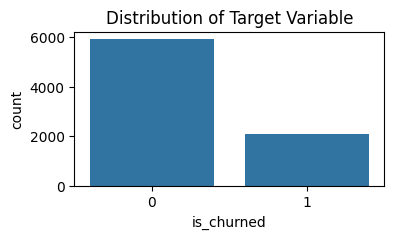

In [ ]:
# Distribution of Target variable
print(df['is_churned'].value_counts(normalize=True))

plt.figure(figsize=(4, 2))
sns.countplot(x='is_churned', data=df)
plt.title('Distribution of Target Variable')
plt.show()

There were a moderate class imbalance with 1/4 of the customer churned, while 3/4 of the customer stays.

<Figure size 800x600 with 0 Axes>

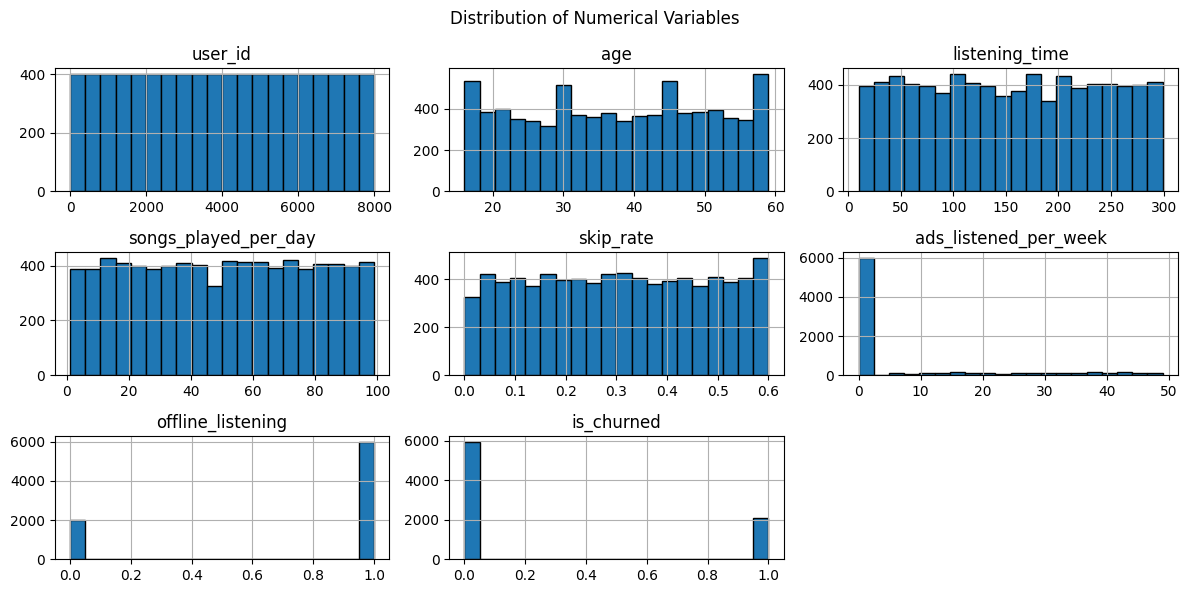

In [ ]:
from pickle import encode_long
# Distribution of numerical variables
plt.figure(figsize=(8,6))

df.hist(figsize=(12, 6), bins=20, edgecolor='black', layout=(3, 3))
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout()
plt.show()


# Feature Engineering

# Preprocessing

# Feature Selection

# Modeling

# Result & Evaluation

In [ ]:
# test

In [ ]:
# test 1

In [ ]:
# test 2